# Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [4]:
train=pd.read_csv('train.tsv', sep='\t')
valid=pd.read_csv('valid.tsv', sep='\t')
test=pd.read_csv('test.tsv', sep='\t')

print("\n"+"="*60)

train.to_csv('train.csv', index=False)
valid.to_csv('valid.csv', index=False)
test.to_csv('test.csv', index=False)

print("successfully converted")
print("\n"+"="*60)

print("Training set Shape:", train.shape)
print("Validation set Shape:", valid.shape)
print("Test set Shape:", test.shape)


print("Column Names:")
print(train.columns.tolist())
print("\nFirst 3 rows of Training Data:")
print(train.head())



successfully converted

Training set Shape: (10239, 14)
Validation set Shape: (1283, 14)
Test set Shape: (1266, 14)
Column Names:
['2635.json', 'false', 'Says the Annies List political group supports third-trimester abortions on demand.', 'abortion', 'dwayne-bohac', 'State representative', 'Texas', 'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer']

First 3 rows of Training Data:
    2635.json        false  \
0  10540.json    half-true   
1    324.json  mostly-true   
2   1123.json        false   
3   9028.json    half-true   
4  12465.json         true   

                                                                            Says the Annies List political group supports third-trimester abortions on demand.  \
0                When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.   
1                                                    Hillary Clinton agrees with John McCain "by voting t

In [5]:
column_names=[
    'id',
    'label',
    'statement',
    'subject',
    'speaker',
    'speaker_job',
    'state_info',
    'party_affiliation',
    'barely_true_counts',
    'false_counts',
    'half_true_counts',
    'mostly_true_counts',
    'pants_on_fire_counts',
    'context'
]

train.columns=column_names
test.columns=column_names
valid.columns=column_names

print(train.columns.tolist())

train.head()
train.to_csv('train.csv', index=False)
valid.to_csv('valid.csv', index=False)
test.to_csv('test.csv', index=False)



['id', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']


In [6]:
train.head()

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,10540.json,half-true,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to mandate free sex change surgeries.,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of my term.,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


# DATA EXPLORATION AND ANALYSIS

In [7]:
# TRAIN DATASET
# check label distribution
print("Label Distribution in TRAINING set:")
print(train['label'].value_counts())
print("\n"+"="*60)

# check the unique labels
print("Unique Labels:")
print(train['label'].unique())
print("\n"+"="*60)

# check for missing values
print("Missing values in training set:")
missing_values=train.isnull().sum()
print(missing_values[missing_values>0]) # only show columns with missing values
print("\n"+"="*60)

# basic statistics about the statement length
train['statement_length']=train['statement'].astype(str).apply(len)
print(train['statement_length'].describe())
print("\n"+"="*60)

print("Data Types:")
print(train.dtypes)

Label Distribution in TRAINING set:
label
half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

Unique Labels:
['half-true' 'mostly-true' 'false' 'true' 'barely-true' 'pants-fire']

Missing values in training set:
subject                    2
speaker                    2
speaker_job             2898
state_info              2210
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64

count    10239.000000
mean       106.921184
std         59.920142
min         11.000000
25%         73.000000
50%         99.000000
75%        132.500000
max       3192.000000
Name: statement_length, dtype: float64

Data Types:
id                       object
label                    object
statement                object
subject                  object
spea

In [8]:
# TEST DATASET
# check label distribution
print("Label Distribution in TEST set:")
print(test['label'].value_counts())
print("\n"+"="*60)

# check the unique labels
print("Unique Labels:")
print(test['label'].unique())
print("\n"+"="*60)

# check for missing values
print("Missing values in test set:")
missing_values=test.isnull().sum()
print(missing_values[missing_values>0]) # only show columns with missing values
print("\n"+"="*60)

# basic statistics about the statement length
test['statement_length']=test['statement'].astype(str).apply(len)
print(test['statement_length'].describe())
print("\n"+"="*60)

print("Data Types:")
print(test.dtypes)

Label Distribution in TEST set:
label
half-true      265
false          249
mostly-true    241
barely-true    212
true           207
pants-fire      92
Name: count, dtype: int64

Unique Labels:
['false' 'half-true' 'pants-fire' 'true' 'barely-true' 'mostly-true']

Missing values in test set:
speaker_job    325
state_info     262
context         17
dtype: int64

count    1266.000000
mean      109.611374
std        98.062797
min        12.000000
25%        74.250000
50%        98.500000
75%       133.000000
max      2941.000000
Name: statement_length, dtype: float64

Data Types:
id                      object
label                   object
statement               object
subject                 object
speaker                 object
speaker_job             object
state_info              object
party_affiliation       object
barely_true_counts       int64
false_counts             int64
half_true_counts         int64
mostly_true_counts       int64
pants_on_fire_counts     int64
context      

In [9]:
# VALID DATASET
# check label distribution
print("Label Distribution in VALID set:")
print(valid['label'].value_counts())
print("\n"+"="*60)

# check the unique labels
print("Unique Labels:")
print(valid['label'].unique())
print("\n"+"="*60)

# check for missing values
print("Missing values in validation set:")
missing_values=valid.isnull().sum()
print(missing_values[missing_values>0]) # only show columns with missing values
print("\n"+"="*60)

# basic statistics about the statement length
valid['statement_length']=valid['statement'].astype(str).apply(len)
print(valid['statement_length'].describe())
print("\n"+"="*60)

print("Data Types:")
print(valid.dtypes)

Label Distribution in VALID set:
label
false          263
mostly-true    251
half-true      248
barely-true    236
true           169
pants-fire     116
Name: count, dtype: int64

Unique Labels:
['pants-fire' 'false' 'half-true' 'true' 'barely-true' 'mostly-true']

Missing values in validation set:
speaker_job    345
state_info     279
context         12
dtype: int64

count    1283.000000
mean      106.756041
std        44.665603
min        17.000000
25%        74.000000
50%        99.000000
75%       133.500000
max       327.000000
Name: statement_length, dtype: float64

Data Types:
id                      object
label                   object
statement               object
subject                 object
speaker                 object
speaker_job             object
state_info              object
party_affiliation       object
barely_true_counts       int64
false_counts             int64
half_true_counts         int64
mostly_true_counts       int64
pants_on_fire_counts     int64
contex

# DATA VISUALIZATION

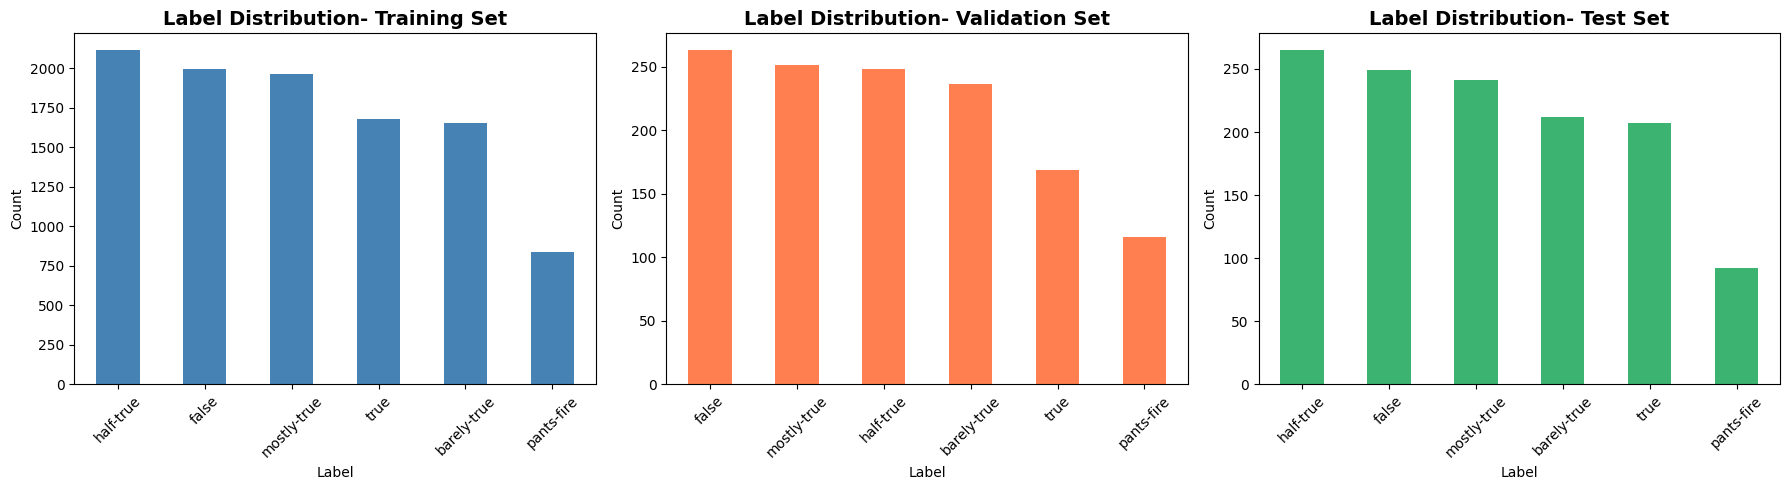

Visualization complete!


In [10]:
fig, axes= plt.subplots(1,3,figsize=(18,5))

# Training Set
train['label'].value_counts().plot(kind='bar',ax=axes[0], color='steelblue')
axes[0].set_title('Label Distribution- Training Set', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x',rotation=45)

# Validation Set
valid['label'].value_counts().plot(kind='bar',ax=axes[1], color='coral')
axes[1].set_title('Label Distribution- Validation Set', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x',rotation=45)

# Test Set
test['label'].value_counts().plot(kind='bar',ax=axes[2], color='mediumseagreen')
axes[2].set_title('Label Distribution- Test Set', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Label')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

print("Visualization complete!")

# Handling Missing Values

In [11]:
print("Missing Values Summary:")
print("\nTraining Set:")
print(train.isnull().sum()[train.isnull().sum()>0])
print("\nValidation Set:")
print(valid.isnull().sum()[valid.isnull().sum()>0])
print("\nTest Set:")
print(test.isnull().sum()[test.isnull().sum()>0])
print("\n"+"="*60)

# Filling missing values:
# For text columns, use 'unknown'
# For numeric columns, use 0

def handle_missing_values(df):
    # Creating a copy to avoid modifying the original
    df_copy= df.copy()

    text_columns=['subject', 'speaker', 'speaker_job', 'state_info', 'party_affiliation', 'context']
    for col in text_columns:
        if col in df_copy.columns:
            df_copy[col]=df_copy[col].fillna('unknown')

    numeric_columns=['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
    for col in numeric_columns:
        if col in df_copy.columns:
            df_copy[col]=df_copy[col].fillna(0)


    return df_copy


train=handle_missing_values(train)
valid=handle_missing_values(valid)
test=handle_missing_values(test)

print("Missing values handled!")
print("\nVerification - Missing values after handling:")
print("Training Set:", train.isnull().sum().sum())
print("Validation Set:", valid.isnull().sum().sum())
print("Test Set:", test.isnull().sum().sum())

Missing Values Summary:

Training Set:
subject                    2
speaker                    2
speaker_job             2898
state_info              2210
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64

Validation Set:
speaker_job    345
state_info     279
context         12
dtype: int64

Test Set:
speaker_job    325
state_info     262
context         17
dtype: int64

Missing values handled!

Verification - Missing values after handling:
Training Set: 0
Validation Set: 0
Test Set: 0


# Text Preprocessing

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
# Lemmatizer
import re
lemmatizer= WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
def preprocess_text(text):
    """
    Preprocesses text by:
    1. Converting to lowercase
    2. Removing URLs
    3. Removing special characters and digits
    4. Removing extra whitespace
    5. Removing stopwords
    6. Lemmatizing words
    
    """

    # Convert to string and lowercase
    text=str(text).lower()

    # Remove URLs
    text=re.sub(r'http\S+|www\S+|https\S+','', text, flags=re.MULTILINE)
    # Remove special characters and digits
    text=re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text=" ".join(text.split())
    #Tokenize and remove stopwords
    words=text.split()
    words=[word for word in words if word in stop_words and len(word)>2]
    #Lemmatize
    words=[lemmatizer.lemmatize(word) for word in words]

    cleaned_text=' '.join(words)

    return cleaned_text

print("Testing preprocessing functon:")
sample_text=train['statement'].iloc[0]
print("\nOriginal text:")
print(sample_text[:200])
print("\nCleaned text:")
print(preprocess_text(sample_text)[:200])



Testing preprocessing functon:

Original text:
When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.

Cleaned text:
when did the when off that


In [14]:
print("Processing training set...")
train['cleaned_statement']=train['statement'].apply(preprocess_text)
print(f"Training set processed:{len(train)} statements")

print("Processing validation set...")
valid['cleaned_statement']=valid['statement'].apply(preprocess_text)
print(f"Validation set processed:{len(valid)} statements")

print("Processing test set...")
test['cleaned_statement']=test['statement'].apply(preprocess_text)
print(f"Test set processed:{len(test)} statements")

Processing training set...
Training set processed:10239 statements
Processing validation set...
Validation set processed:1283 statements
Processing test set...
Test set processed:1266 statements


In [15]:
empty_count=(train['cleaned_statement'].str.len()==0).sum()
print(f"\n\nStatements with no text after cleaning: {empty_count}")



Statements with no text after cleaning: 582


# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train['label_encoded']=label_encoder.fit_transform(train['label'])
valid['label_encoded']=label_encoder.fit_transform(valid['label'])
test['label_encoded']=label_encoder.fit_transform(test['label'])

print("Label Mapping:")
label_mapping=dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for label, code in sorted(label_mapping.items(), key=lambda x: x[1]):
    print(f"{code}: {label}")

print("Sample data with labels:")
print(train[['statement', 'label', 'label_encoded']].head())

import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("\nLabel encoder saved as 'label_encoder.pkl'")

Label Mapping:
0: barely-true
1: false
2: half-true
3: mostly-true
4: pants-fire
5: true
Sample data with labels:
                                                                                                                                                     statement  \
0                When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.   
1                                                    Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."   
2                                                                               Health care reform legislation is likely to mandate free sex change surgeries.   
3                                                                                                       The economic turnaround started at the end of my term.   
4  The Chicago Bears have had more starting quarterbacks in the last 10 year

In [17]:
train.head()

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,statement_length,cleaned_statement,label_encoded
0,10540.json,half-true,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141,when did the when off that,2
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105,with the the,3
2,1123.json,false,Health care reform legislation is likely to mandate free sex change surgeries.,health-care,blog-posting,unknown,unknown,none,7.0,19.0,3.0,5.0,44.0,a news release,78,,1
3,9028.json,half-true,The economic turnaround started at the end of my term.,"economy,jobs",charlie-crist,unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54,the the,2
4,12465.json,true,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,155,the have had more the than the during the,5


# Feature Extraction

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Use top 5000 most important words
    min_df=2,           # Word must appear in at least 2 documents
    max_df=0.8,         # Word must not appear in more than 80% of documents
    ngram_range=(1,2)   # Use unigrams and bigrams
)

print("Applying TF-IDF vectorization...")
print("\n"+"="*60)

x_train=tfidf_vectorizer.fit_transform(train['cleaned_statement'])
x_valid=tfidf_vectorizer.transform(valid['cleaned_statement'])
x_test=tfidf_vectorizer.transform(test['cleaned_statement'])

y_train=train['label_encoded']
y_valid=valid['label_encoded']
y_test=test['label_encoded']


print("TF-IDF Vectorization Complete!")
print("\n"+"="*60)
print("Feature Matrix Shapes:")
print(f"x_train: {x_train.shape}")
print(f"x_valid: {x_valid.shape}")
print(f"x_test: {x_test.shape}")

print("\n"+"="*60)
print(f"Number of features: {len(tfidf_vectorizer.get_feature_names_out())}")
print(f"\nSample features: {list(tfidf_vectorizer.get_feature_names_out()[:20])}")


with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
print("\nTf-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")

Applying TF-IDF vectorization...

TF-IDF Vectorization Complete!

Feature Matrix Shapes:
x_train: (10239, 2352)
x_valid: (1283, 2352)
x_test: (1266, 2352)

Number of features: 2352

Sample features: ['about', 'about about', 'about against', 'about all', 'about and', 'about any', 'about are', 'about because', 'about being', 'about but', 'about did', 'about doing', 'about during', 'about for', 'about from', 'about had', 'about have', 'about having', 'about her', 'about his']

Tf-IDF vectorizer saved as 'tfidf_vectorizer.pkl'


# Model Training

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

# Model 1: Logistic Regression
print("Training Logistic Regression...")
start_time=time.time()

lr_model=LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)
lr_model.fit(x_train, y_train)

lr_train_time=time.time()-start_time
print(f"Logistic Regression trained in {lr_train_time:.2f} seconds")

# Predictions
y_train_pred_lr=lr_model.predict(x_train)
y_valid_pred_lr=lr_model.predict(x_valid)

#Accuracy
lr_train_acc=accuracy_score(y_train, y_train_pred_lr)
lr_valid_acc=accuracy_score(y_valid, y_valid_pred_lr)

print(f"Training Accuracy: {lr_train_acc:.4f}")
print(f"Validation Accuracy: {lr_valid_acc:.4f}")

print("\n"+"="*60)

# Model 2: Multinomial Naive Bayes
print("Training Multinomial Naive Bayes...")
start_time=time.time()

nb_model=MultinomialNB(alpha=0.1)
nb_model.fit(x_train, y_train)

nb_train_time=time.time()-start_time
print(f"Naive Bayes trained in {lr_train_time:.2f} seconds")

# Predictions
y_train_pred_nb=nb_model.predict(x_train)
y_valid_pred_nb=nb_model.predict(x_valid)

#Accuracy
nb_train_acc=accuracy_score(y_train, y_train_pred_nb)
nb_valid_acc=accuracy_score(y_valid, y_valid_pred_nb)

print(f"Training Accuracy: {nb_train_acc:.4f}")
print(f"Validation Accuracy: {nb_valid_acc:.4f}")

print("\n"+"="*60)
print("Model Comparison:")
print(f"Logistic Regression - Validation Accuracy: {lr_valid_acc:.4f}")
print(f"Naive Bayes - Validation Accuracy: {nb_valid_acc:.4f}")

Training Logistic Regression...
Logistic Regression trained in 1.80 seconds
Training Accuracy: 0.4110
Validation Accuracy: 0.2346

Training Multinomial Naive Bayes...
Naive Bayes trained in 1.80 seconds
Training Accuracy: 0.4367
Validation Accuracy: 0.2229

Model Comparison:
Logistic Regression - Validation Accuracy: 0.2346
Naive Bayes - Validation Accuracy: 0.2229


# Evaluation

In [20]:
# Logistic Regression
print("LOGISTIC REGRESSION - DETAILED EVALUATION")
print("\nClassification Report on Validation Set:")
print(classification_report(y_valid, y_valid_pred_lr, target_names=label_encoder.classes_,digits=4))
print("\n"+"="*60)

# Naive Bayes
print("MULTINOMIAL NAIVE BAYES - DETAILED EVALUATION")
print("\nClassification Report on Validation Set:")
print(classification_report(y_valid, y_valid_pred_nb, target_names=label_encoder.classes_,digits=4))
print("\n"+"="*60)
print("Summary:")
print(f"Logistic Regression Validation Accuracy: {lr_valid_acc:.4f}")
print(f"Naive Bayes Validation Accuracy: {nb_valid_acc:.4f}")


if lr_valid_acc > nb_valid_acc:
    best_model=lr_model
    best_model_name="Logistic Regression"
    best_accuracy=lr_valid_acc
else:
    best_model=nb_model
    best_model_name="Multinomial Naive Bayes"
    best_accuracy=nb_valid_acc

print(f"\nBest model: {best_model_name} with accuracy {best_accuracy:.4f}")

LOGISTIC REGRESSION - DETAILED EVALUATION

Classification Report on Validation Set:
              precision    recall  f1-score   support

 barely-true     0.2205    0.1186    0.1543       236
       false     0.2576    0.3878    0.3096       263
   half-true     0.2738    0.3710    0.3151       248
 mostly-true     0.1919    0.2072    0.1992       251
  pants-fire     0.1429    0.0172    0.0308       116
        true     0.1799    0.1479    0.1623       169

    accuracy                         0.2346      1283
   macro avg     0.2111    0.2083    0.1952      1283
weighted avg     0.2204    0.2346    0.2159      1283


MULTINOMIAL NAIVE BAYES - DETAILED EVALUATION

Classification Report on Validation Set:
              precision    recall  f1-score   support

 barely-true     0.2288    0.1144    0.1525       236
       false     0.2546    0.3650    0.3000       263
   half-true     0.2111    0.3226    0.2552       248
 mostly-true     0.2087    0.2112    0.2099       251
  pants-fire 

# Confusion Matrix Visualization

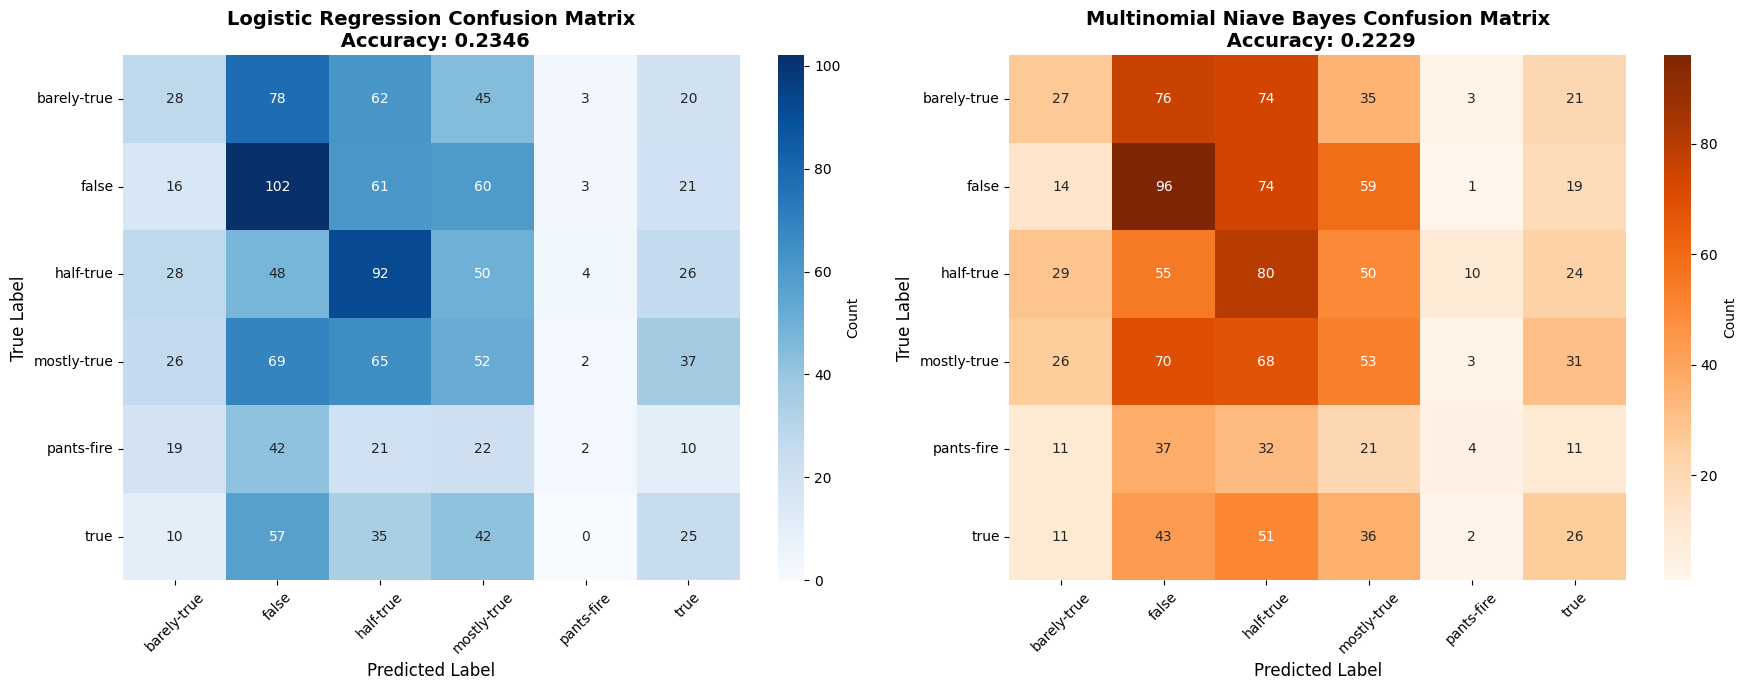

In [21]:
import seaborn as sns
cm_lr=confusion_matrix(y_valid, y_valid_pred_lr)
cm_nb=confusion_matrix(y_valid, y_valid_pred_nb)

fig, axes=plt.subplots(1,2, figsize=(18,7))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0], cbar_kws={'label':'Count'})
axes[0].set_title(f'Logistic Regression Confusion Matrix\n Accuracy: {lr_valid_acc:.4f}',fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Multinomial Naive Bayes Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1], cbar_kws={'label':'Count'})
axes[1].set_title(f'Multinomial Niave Bayes Confusion Matrix\n Accuracy: {nb_valid_acc:.4f}',fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()



# Evaluation on Test Set

FINAL EVALUTION ON TEST SET

Using: Logistic Regression

Test Set Accuracy: 0.2030


Detailed Classification report on Test Set:
              precision    recall  f1-score   support

 barely-true     0.1799    0.1179    0.1425       212
       false     0.2234    0.3454    0.2713       249
   half-true     0.2038    0.2453    0.2226       265
 mostly-true     0.2028    0.2365    0.2184       241
  pants-fire     0.0000    0.0000    0.0000        92
        true     0.1832    0.1159    0.1420       207

    accuracy                         0.2030      1266
   macro avg     0.1655    0.1768    0.1661      1266
weighted avg     0.1853    0.2030    0.1886      1266



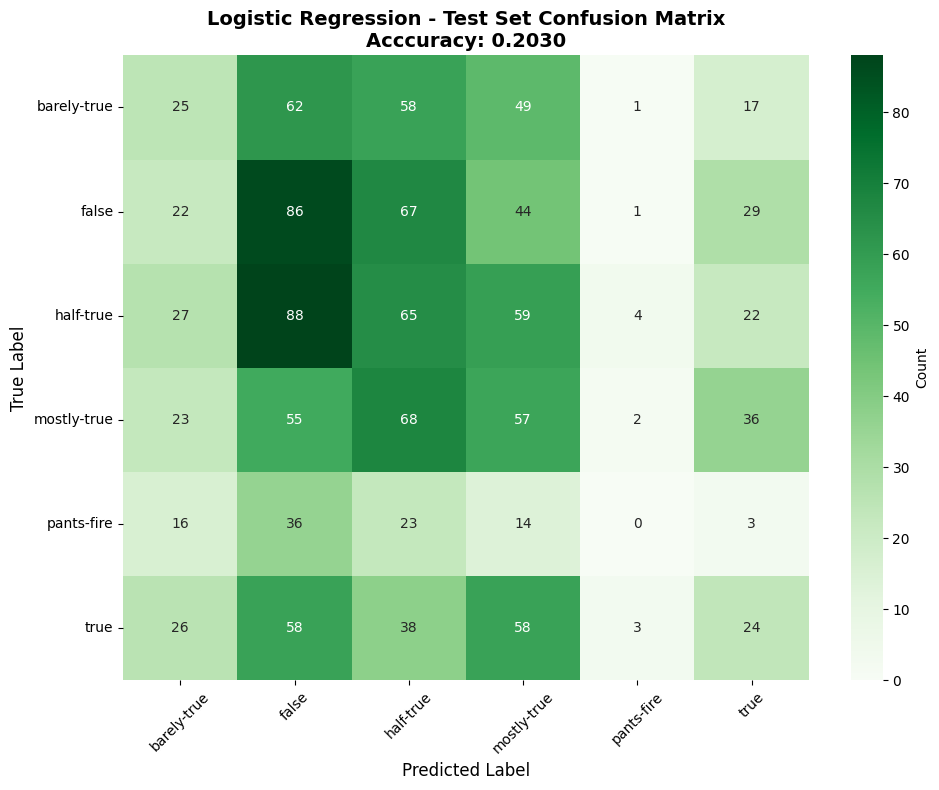

In [22]:
print("FINAL EVALUTION ON TEST SET")
print("\n"+"="*60)

# Using best model- LR
print(f"Using: {best_model_name}")
print("\n"+"="*60)

y_test_pred=best_model.predict(x_test)

test_acc=accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_acc:.4f}")
print("\n"+"="*60)


print("\nDetailed Classification report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_, digits=4))

cm_test=confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar_kws={'label':'Count'})
plt.title(f'{best_model_name} - Test Set Confusion Matrix\nAcccuracy: {test_acc:.4f}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [23]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


    

In [26]:
def predict_news(statement, model, vectorizer, encoder):
    """
    Predict whether a news statement is fake or not

    Parameters:
    - statement: The news statement text
    - model: Trained ML model
    - vectorizer: Fitted TF-IDF vectorizer
    - encoder: Fitted label encoder

    Returns: 
    - Predicted label and probability distrubution
    """

    # Preprocess the statement
    cleaned= preprocess_text(statement)

    # Transform using TF-IDF
    features= vectorizer.transform([cleaned])

    # Make Prediction
    prediction= model.predict(features)[0]
    prediction_prob= model.predict_proba(features)[0]

    # Decode label
    predicted_label=encoder.inverse_transform([prediction])[0]

    class_probabilities=dict(zip(encoder.classes_, prediction_prob))
    return predicted_label, class_probabilities

test_statements=[
    "The president signed a new bill into law today.",
    "Scientists discovered that the earth is flat and NASA has been lying.",
    "The unemployment rate decreased by 2% last quarter according to official statistics.",
]

for i, statement in enumerate(test_statements, 1):
    print(f"\nExample {i}:")
    print(f"Statement: {statement}")
    print("-"*60)

    predicted_label, probabilities= predict_news(
        statement, best_model, tfidf_vectorizer, label_encoder
    )

    print(f"Predicted Label: {predicted_label}")
    print("\nProbability Distribution:")

    sorted_probs=sorted(probabilities.items(), key=lambda x: x[1], reverse=True)
    for label, prob in sorted_probs:
        bar='|' * int(prob*50)
        print(f" {label:15s}: {prob:.4f} {bar}")
    print("\n"+"="*60)

    
    


Example 1:
Statement: The president signed a new bill into law today.
------------------------------------------------------------
Predicted Label: false

Probability Distribution:
 false          : 0.2458 ||||||||||||
 barely-true    : 0.2248 |||||||||||
 half-true      : 0.2181 ||||||||||
 mostly-true    : 0.1240 ||||||
 pants-fire     : 0.1109 |||||
 true           : 0.0765 |||


Example 2:
Statement: Scientists discovered that the earth is flat and NASA has been lying.
------------------------------------------------------------
Predicted Label: true

Probability Distribution:
 true           : 0.2535 ||||||||||||
 half-true      : 0.2174 ||||||||||
 mostly-true    : 0.1762 ||||||||
 false          : 0.1455 |||||||
 barely-true    : 0.1394 ||||||
 pants-fire     : 0.0681 |||


Example 3:
Statement: The unemployment rate decreased by 2% last quarter according to official statistics.
------------------------------------------------------------
Predicted Label: false

Probability Dis